C:\Users\Lara\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128247 (\N{CAMERA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


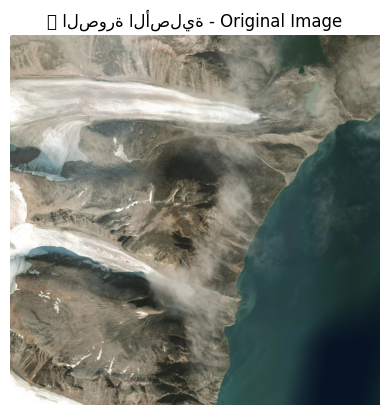


🚀 تطبيق DCP...
✅ تمت معالجة الصورة وحفظها في: results\aoi0_dcp.png


C:\Users\Lara\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127787 (\N{FOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


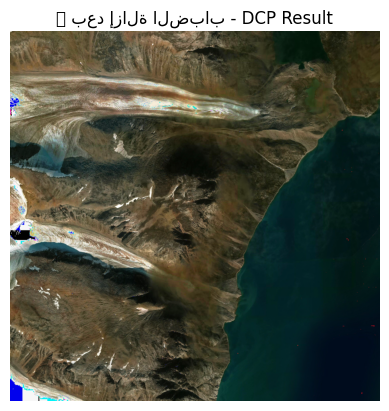


🚀 تطبيق Retinex MSR...
✅ تم حفظ الصورة المحسّنة: results/aoi0_msr.png


C:\Users\Lara\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


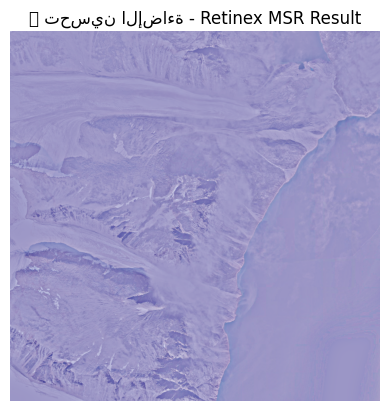


🚀 تطبيق Retinex SSR...
✅ تم حفظ الصورة المحسّنة: results/aoi0_ssr.png


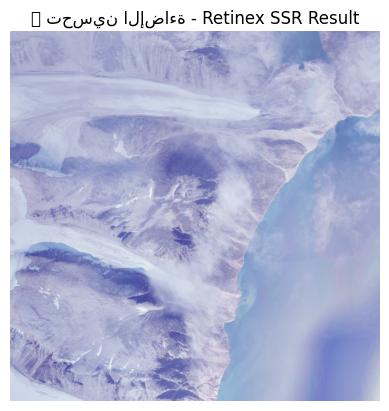

In [1]:
# ملف: DehazingDemo.ipynb

# هذا النوتبوك يسمح لك بتجربة خوارزميات إزالة الضباب وتحسين الصور على صور الأقمار الصناعية

# ✅ التجربة تشمل:
# - Dark Channel Prior (DCP)
# - Retinex (MSR و SSR)

# ✅ المتطلبات:
# pip install opencv-python numpy matplotlib


import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('./src')

from dark_channel import dehaze_image
from retinex import retinex_enhance

import os

# دالة لعرض الصور

def show_image(img, title="Image"):
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# --- مثال لتجربة DCP ---

#input_path = 'data/sample_satellite.png'  # ضع اسم صورتك هنا
input_path = 'data/aoi0.tif'

#output_path_dcp = 'results/sample_satellite_dcp.png'
output_path_dcp = 'results/aoi0_dcp.png'

# --- تجربة صورة aoi0.tif ---

input_path = 'data/aoi0.tif'
original = cv2.imread(input_path)
show_image(original, "📷 الصورة الأصلية - Original Image")


# --- تطبيق DCP ---
print("\n🚀 تطبيق DCP...")
dehaze_image(input_path, 'results')
output_path_dcp = 'results/aoi0_dcp.png'
img_dcp = cv2.imread(output_path_dcp)
show_image(img_dcp, "🌫️ بعد إزالة الضباب - DCP Result")

# --- تطبيق Retinex MSR ---
print("\n🚀 تطبيق Retinex MSR...")
output_path_msr = 'results/aoi0_msr.png'
retinex_enhance(input_path, output_path_msr, method="MSR")
img_msr = cv2.imread(output_path_msr)
show_image(img_msr, "✨ تحسين الإضاءة - Retinex MSR Result")

# --- تطبيق Retinex SSR ---
print("\n🚀 تطبيق Retinex SSR...")
output_path_ssr = 'results/aoi0_ssr.png'
retinex_enhance(input_path, output_path_ssr, method="SSR")
img_ssr = cv2.imread(output_path_ssr)
show_image(img_ssr, "✨ تحسين الإضاءة - Retinex SSR Result")

